In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt
from numpy.matlib import repmat
from sklearn.preprocessing import normalize

%matplotlib inline

In [2]:
def eigsort(V, eigvals):
    
    # Sort the eigenvalues from largest to smallest. Store the sorted
    # eigenvalues in the column vector lambd.
    lohival = np.sort(eigvals)
    lohiindex = np.argsort(eigvals)
    lambd = np.flip(lohival)
    index = np.flip(lohiindex)
    Dsort = np.diag(lambd)
    
    # Sort eigenvectors to correspond to the ordered eigenvalues. Store sorted
    # eigenvectors as columns of the matrix vsort.
    M = np.size(lambd)
    Vsort = np.zeros((M, M))
    for i in range(M):
        Vsort[:,i] = V[:,index[i]]
    return Vsort, Dsort


In [3]:
df = pd.read_csv("encoded_smartphone_data.csv")

In [4]:
df

,Unnamed: 0,Brand,Model,Added,Width,Height,Depth,Volume,Band Count,RAM_TYPE_DDR SDRAM,...,"ProtectionFromLiquids_5 Protected against low pressure jets (all directions), limited ingress",ProtectionFromLiquids_6 Protection against powerful jets of water,ProtectionFromLiquids_7 Protected against immersion up to 1m of depth,ProtectionFromLiquids_8 Protected against immersion beyond 1m of depth,ProtectionFromLiquids_9 Protected against high temperature high pressure spray downs,ProtectionFromLiquids_Non-standard protection,ProtectionFromLiquids_Yes,DataIntegrity_Final,DataIntegrity_Incomplete,DataIntegrity_Preliminary
0,0,ZTE,Blade 20 Smart Global TD-LTE 128GB,1/1/2020 12:55,76.6,162.91,8.95,111686.20870,14,0,...,0,0,0,0,0,0,1,0,0,1
1,1,Samsung,SM-G6200 Galaxy A6s Dual SIM TD-LTE CN 128GB,11/7/2018 22:32,76.5,156.30,8.40,100438.38000,21,0,...,0,0,0,0,0,0,1,0,0,1
2,2,LG,LMV450VMB V50 ThinQ 5G TD-LTE US V450VMB,3/5/2019 23:31,76.1,159.20,8.30,100555.49600,20,0,...,0,0,0,1,0,0,0,1,0,0
3,3,Huawei,Y5 Lite 2018 Dual SIM LTE LATAM CAG-LX3 / CAG-L23,5/10/2018 20:11,73.7,145.10,9.45,101057.07150,12,0,...,0,0,0,0,0,0,1,0,0,1
4,4,Nokia,4.2 Dual SIM TD-LTE AM 32GB,8/14/2019 15:07,71.3,148.95,8.39,89102.93265,21,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13564,13938,Samsung,SGH-i780,9/22/2007 23:57,61.3,115.90,12.90,91650.24300,4,0,...,0,0,0,0,0,0,1,1,0,0
13565,13939,Vodafone,VPA Compact GPS,1/31/2007 13:51,58.2,108.00,18.40,115655.04000,7,0,...,0,0,0,0,0,0,1,1,0,0
13566,13940,E-TEN,InfoTouch P603,4/3/2005 18:03,82.0,137.40,18.40,207309.12000,3,0,...,0,0,0,0,0,0,1,1,0,0
13567,13941,Airis,T482,8/15/2008 18:05,62.0,125.00,14.00,108500.00000,4,0,...,0,0,0,0,0,0,1,1,0,0


In [5]:
df = df.drop(labels = ['Unnamed: 0', 'Brand', 'Model', 'Added'], axis = 1)
df = normalize(df)
sample_mean = np.mean(df, axis = 1)
sample_mean = sample_mean.T
sample_mean

array([0.00672825, 0.00673012, 0.00673019, ..., 0.00671979, 0.0067252 ,
       0.00672177])

In [6]:
df_series = pd.Series(sample_mean)
df_series

0        0.006728
1        0.006730
2        0.006730
3        0.006729
4        0.006732
           ...   
13564    0.006727
13565    0.006724
13566    0.006720
13567    0.006725
13568    0.006722
Length: 13569, dtype: float64

In [7]:
reshape_mean = pd.DataFrame(df_series)
reshape_mean

,0
0,0.006728
1,0.006730
2,0.006730
3,0.006729
4,0.006732
...,...
13564,0.006727
13565,0.006724
13566,0.006720
13567,0.006725


In [8]:
covariance_matrix = np.cov(reshape_mean)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Degrees of freedom <= 0 for slice
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [10]:
df = np.array(df)
mean = np.array(reshape_mean)
#array = df - mean
N = np.shape(df[1])
mean.shape

(13569, 1)

In [12]:
Z_df = df - mean
Z_df

array([[-0.0060424 , -0.00526962, -0.00664812, ..., -0.00672825,
        -0.00672825, -0.0067193 ],
       [-0.00596846, -0.00517395, -0.00664649, ..., -0.00673012,
        -0.00673012, -0.00672017],
       [-0.0059734 , -0.00514699, -0.00664765, ..., -0.00672025,
        -0.00673019, -0.00673019],
       ...,
       [-0.00632424, -0.00605701, -0.00663103, ..., -0.00671496,
        -0.00671979, -0.00671979],
       [-0.00615377, -0.00557312, -0.00659617, ..., -0.00671598,
        -0.0067252 , -0.0067252 ],
       [-0.00624694, -0.00592471, -0.00659915, ..., -0.00671496,
        -0.00672177, -0.00672177]])

In [14]:
covmatrix=np.dot(Z_df.T,Z_df)/N
covmatrix

array([[0.00325165, 0.00284353, 0.0036043 , ..., 0.00365848, 0.0036608 ,
        0.00365757],
       [0.00284353, 0.00249067, 0.00314955, ..., 0.00319702, 0.00319904,
        0.00319624],
       [0.0036043 , 0.00314955, 0.00399786, ..., 0.00405779, 0.00406037,
        0.00405676],
       ...,
       [0.00365848, 0.00319702, 0.00405779, ..., 0.0041187 , 0.00412132,
        0.00411765],
       [0.0036608 , 0.00319904, 0.00406037, ..., 0.00412132, 0.00412393,
        0.00412027],
       [0.00365757, 0.00319624, 0.00405676, ..., 0.00411765, 0.00412027,
        0.00411661]])

In [15]:
covmatrix.shape

(149, 149)

In [16]:
eig_value, eig_vect=np.linalg.eig(covmatrix)

In [17]:
V = np.linalg.eig(covmatrix)

In [18]:
V_old = eig_vect
eigvals = eig_value
V_sort, D_sort = eigsort(V_old, eigvals)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


In [19]:
C = V_sort @ Z_df.T

In [20]:
C.shape

(149, 13569)

In [21]:
C[1,:].shape

(13569,)

In [22]:
C[:,1].shape

(149,)

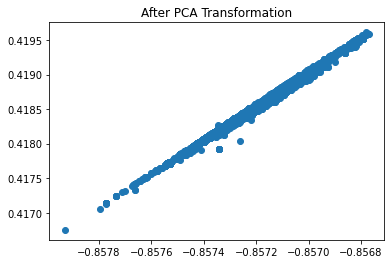

In [24]:
plt.scatter(C[0,:], C[1,:])
plt.title('After PCA Transformation')
plt.show()

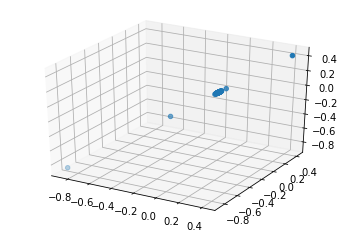

In [25]:
fig = plt.figure()
ax = plt.axes(projection = '3d')
xdata = C[:,0]
ydata = C[:,1]
zdata = C[:,2]
ax.scatter3D(xdata, ydata, zdata, cmap='Greens')